Unless otherwise specified, all experiments run with parameters:

* episode length = 1000
* max search depth = 4
* rollout policy (where applicable) = best arm
* discount (where applicable) = 0.99
* number items = 3
* state space granularity = 3
* teacher to query (where applicable) = 2
* reward range shift = -2
* seed = 1

on state ids:

* 1217
* 1226
* 1235
* 1245
* 4586
* 4589
* 4629
* 4638
* 4641
* 1572
* 1712
* 3191
* 3204
* 3437
* 3446
* 3514
* 3526
* 3616
* 4151
* 4426

In [12]:
from utils.fig import *

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Experiment parameters
runs = 25
actions = ["C1", "C2", "C3", "C4", "B1", "B2", "B3", "B"]
ai, af, pi, pf = "active infinite", "active finite", "passive infinite", "passive finite"
n50, n100, n200 = "naive-50", "naive-100", "naive-200"
ra, rr = "random arms", "random"

# Plotting Parameters
labels = [ai, af, pi, pf, n50, n100, n200, ra, rr]
discount = 0.99
window = 10
;

''

In [14]:
# ai: active infinite
ids_ai = ["active_infinite_23419_152454", "active_infinite_23419_153324", "active_infinite_23419_154231", "active_infinite_23419_155139", "active_infinite_23419_160549", "active_infinite_23419_161648", "active_infinite_23419_162359", "active_infinite_23419_163115", "active_infinite_23419_16401", "active_infinite_23419_164925", "active_infinite_23419_17049", "active_infinite_23419_171313", "active_infinite_23419_172230", "active_infinite_23419_172929", "active_infinite_23419_17394", "active_infinite_23419_174759", "active_infinite_23419_180013", "active_infinite_23419_181126", "active_infinite_23419_182029", "active_infinite_23419_183010"]
data_ai = import_csv(ids_ai, runs)

# af: active finite
ids_af = ["active_finite_23419_214856", "active_finite_23419_22017", "active_finite_23419_22124", "active_finite_23419_222216", "active_finite_23419_223627", "active_finite_23419_22505", "active_finite_23419_230052", "active_finite_23419_230927", "active_finite_23419_232011", "active_finite_23419_233116", "active_finite_23419_23426", "active_finite_23419_235054", "active_finite_23420_000135", "active_finite_23420_001238", "active_finite_23420_002515", "active_finite_23420_004012", "active_finite_23420_00540", "active_finite_23420_010552", "active_finite_23420_011651", "active_finite_23420_012749"]
data_af = import_csv(ids_af, runs)

# pi: passive infinite
ids_pi = ["passive_infinite_23419_183940", "passive_infinite_23419_184948", "passive_infinite_23419_18573", "passive_infinite_23419_191144", "passive_infinite_23419_193217", "passive_infinite_23419_194023", "passive_infinite_23419_194838", "passive_infinite_23419_195741", "passive_infinite_23419_200444", "passive_infinite_23419_201343", "passive_infinite_23419_202155", "passive_infinite_23419_203025", "passive_infinite_23419_203934", "passive_infinite_23419_205227", "passive_infinite_23419_205917", "passive_infinite_23419_210814", "passive_infinite_23419_211748", "passive_infinite_23419_21258", "passive_infinite_23419_213346", "passive_infinite_23419_214029"]
data_pi = import_csv(ids_pi, runs)

# pf: passive finite
ids_pf = ["passive_finite_23422_141255", "passive_finite_23422_142713", "passive_finite_23422_143917", "passive_finite_23422_145237", "passive_finite_23422_150344", "passive_finite_23422_151540", "passive_finite_23422_152710", "passive_finite_23422_153914", "passive_finite_23422_155019", "passive_finite_23422_16003", "passive_finite_23422_161248", "passive_finite_23422_162128", "passive_finite_23422_163156", "passive_finite_23422_164250", "passive_finite_23422_165540", "passive_finite_23422_17041", "passive_finite_23422_17148", "passive_finite_23422_172518", "passive_finite_23422_173548", "passive_finite_23422_174423"]
data_pf = import_csv(ids_pf, runs)

# n50: naive w/50 exploration steps
ids_n50 = ["naive_50_23420_013912", "naive_50_23420_013928", "naive_50_23420_013944", "naive_50_23420_01401", "naive_50_23420_014017", "naive_50_23420_014034", "naive_50_23420_014050", "naive_50_23420_01417", "naive_50_23420_014123", "naive_50_23420_014139", "naive_50_23420_014156", "naive_50_23420_014213", "naive_50_23420_014230", "naive_50_23420_014247", "naive_50_23420_01433", "naive_50_23420_014320", "naive_50_23420_014336", "naive_50_23420_014352", "naive_50_23420_01448", "naive_50_23420_014424"]
data_n50 = import_csv(ids_n50, runs)

# n100: naive w/100 exploration steps
ids_n100 = ["naive_100_23420_014440", "naive_100_23420_014457", "naive_100_23420_014513", "naive_100_23420_014529", "naive_100_23420_014545", "naive_100_23420_01462", "naive_100_23420_014618", "naive_100_23420_014634", "naive_100_23420_014650", "naive_100_23420_01476", "naive_100_23420_014722", "naive_100_23420_014739", "naive_100_23420_014755", "naive_100_23420_014811", "naive_100_23420_014827", "naive_100_23420_014843", "naive_100_23420_01490", "naive_100_23420_014916", "naive_100_23420_014932", "naive_100_23420_014948"]
data_n100 = import_csv(ids_n100, runs)

# n200: naive w/200 exploration steps
ids_n200 = ["naive_200_23420_01504", "naive_200_23420_015021", "naive_200_23420_015037", "naive_200_23420_015053", "naive_200_23420_01519", "naive_200_23420_015125", "naive_200_23420_015142", "naive_200_23420_015158", "naive_200_23420_015215", "naive_200_23420_015231", "naive_200_23420_015247", "naive_200_23420_01534", "naive_200_23420_015320", "naive_200_23420_015336", "naive_200_23420_015352", "naive_200_23420_01549", "naive_200_23420_015425", "naive_200_23420_015441", "naive_200_23420_015457", "naive_200_23420_015514"]
data_n200 = import_csv(ids_n200, runs)

# ra: random arms
ids_ra = ["arms_23420_015531", "arms_23420_015549", "arms_23420_01568", "arms_23420_015626", "arms_23420_015645", "arms_23420_01573", "arms_23420_015722", "arms_23420_015740", "arms_23420_015759", "arms_23420_015817", "arms_23420_015835", "arms_23420_015854", "arms_23420_015912", "arms_23420_015931", "arms_23420_015949", "arms_23420_02007", "arms_23420_020026", "arms_23420_020044", "arms_23420_02013", "arms_23420_020121"]
data_ra = import_csv(ids_ra, runs)

# rr: random
ids_rr = ["random_23422_175947", "random_23422_18006", "random_23422_180025", "random_23422_180044", "random_23422_18014", "random_23422_180122", "random_23422_180141", "random_23422_180159", "random_23422_180218", "random_23422_180237", "random_23422_180256", "random_23422_180315", "random_23422_180334", "random_23422_180353", "random_23422_180412", "random_23422_180431", "random_23422_180450", "random_23422_18058", "random_23422_180527", "random_23422_180547"]
data_rr = import_csv(ids_rr, runs)

data = [data_ai, data_af, data_pi, data_pf, data_n50, data_n100, data_n200, data_ra, data_rr]
;

''

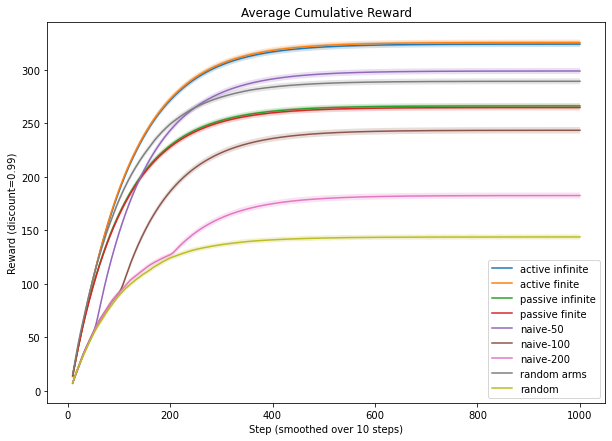

In [15]:
plot_r(data, labels, discount, window)       

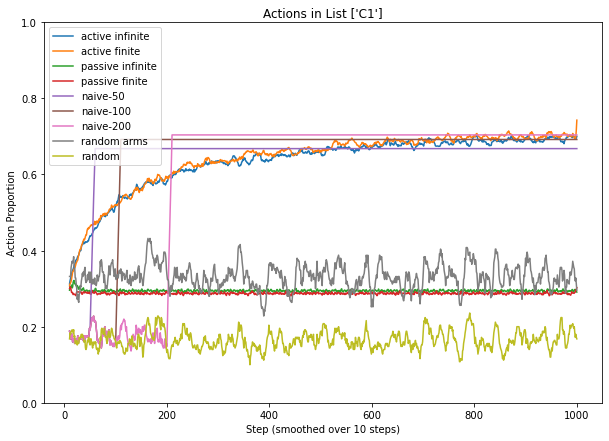

In [16]:
plot_best_arm_actions(data, labels, window)

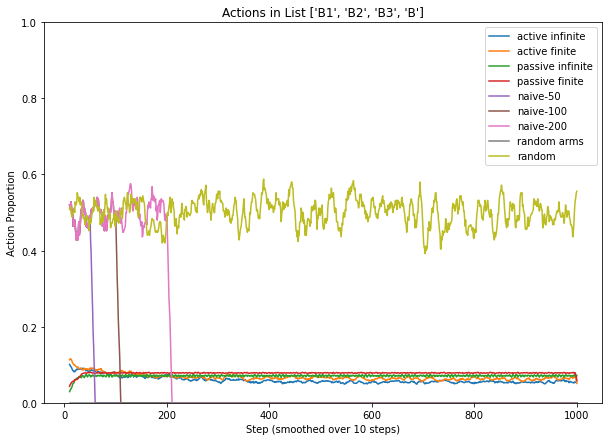

In [17]:
plot_teacher_actions(data, labels, window)

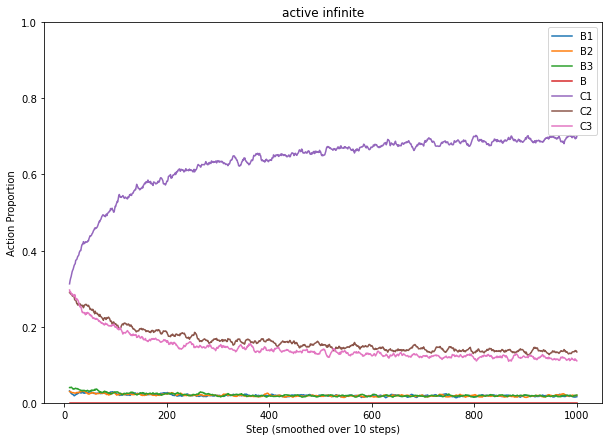

In [18]:
plot_actions(data_ai, ai, window)

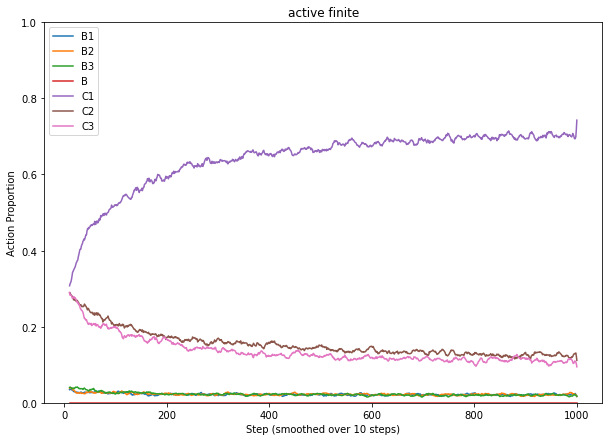

In [19]:
plot_actions(data_af, af, window)

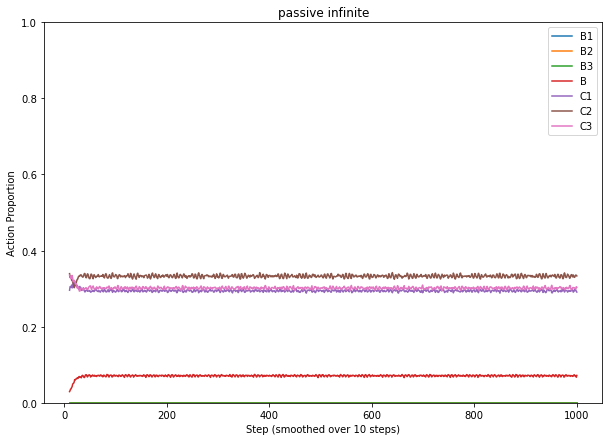

In [20]:
plot_actions(data_pi, pi, window)

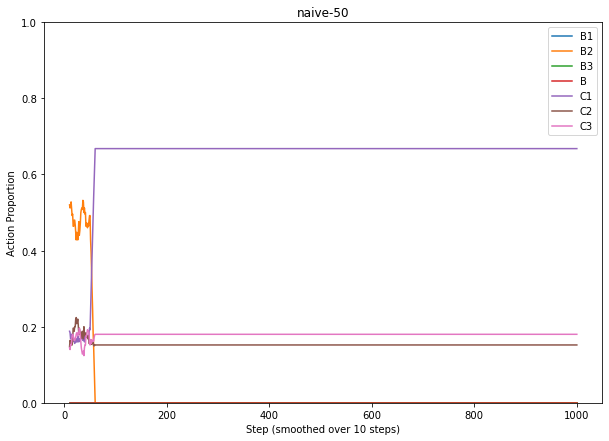

In [21]:
plot_actions(data_n50, n50, window)